In [ ]:
import os
import json

import pandas as pd
import numpy as np
import seaborn as sns

In [385]:
models_names = ["base3", "base4", "base5", "base6"]
path_folder = "./training/{}"

In [386]:
val_distribs = pd.DataFrame(columns=["targets distribution", "predictions distribution",
                                     "errors distribution", "epoch", "model_name"])
val_stats = pd.DataFrame(columns=["targets", "predictions","errors", "absolute_errors", "epoch", "model_name"])

models_loss_evol = pd.DataFrame(columns=models_names, index=np.arange(500))

for name in models_names:
    with open(path_folder.format(name) + "/validation_results.json") as fp:
        dict_results = json.load(fp)
        for e in list(dict_results):
            df_distribs = pd.DataFrame(dict_results[e]["results_distrib"])
            df_distribs["epoch"] = int(e.replace("epoch ",""))
            df_distribs["model_name"] = name
            val_distribs = pd.concat([val_distribs,df_distribs], axis=0)
            
            df_stats = pd.DataFrame(dict_results[e]["results_stats"])
            df_stats["epoch"] = int(e.replace("epoch ",""))
            df_stats["model_name"] = name
            val_stats = pd.concat([val_stats,df_stats], axis=0)
    
    running_loss_evol = pd.read_csv(path_folder.format(name) + "/loss_evol.csv",
                                    index_col=0)
    if running_loss_evol["epoch"].value_counts().min() == running_loss_evol["epoch"].value_counts().max():
        models_loss_evol[name] = running_loss_evol[["epoch","mean loss"]].groupby("epoch").mean()
    else:
        models_loss_evol[name] = running_loss_evol[running_loss_evol["epoch"] 
                                                   != running_loss_evol["epoch"].value_counts().idxmin()][["epoch","mean loss"]].groupby("epoch").mean()
val_distribs.reset_index(drop=False, inplace=True)
val_stats.reset_index(drop=False, inplace=True)

<AxesSubplot:xlabel='epoch', ylabel='std(predictions)/std(targets)'>

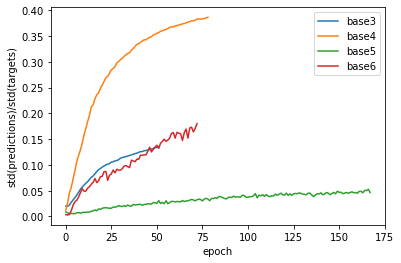

In [387]:
pivoted_df = pd.pivot(val_stats[val_stats["index"]=="std"][["predictions","epoch","model_name"]],
                      index="epoch",
                      columns="model_name")
pivoted_df.columns = pivoted_df.columns.droplevel(0)
pivoted_df.columns.name = None
(pivoted_df/
 val_stats[val_stats["index"]=="std"]["targets"].iloc[0]).plot(xlabel="epoch", ylabel="std(predictions)/std(targets)")

<AxesSubplot:xlabel='epoch', ylabel='mean(predictions)/mean(targets)'>

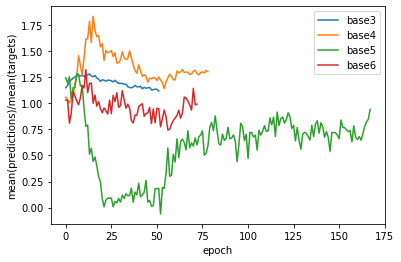

In [388]:
pivoted_df = pd.pivot(val_stats[val_stats["index"]=="mean"][["predictions","epoch","model_name"]],
                      index="epoch",
                      columns="model_name")
pivoted_df.columns = pivoted_df.columns.droplevel(0)
pivoted_df.columns.name = None
(pivoted_df/
 val_stats[val_stats["index"]=="mean"]["targets"].iloc[0]).plot(xlabel="epoch", ylabel="mean(predictions)/mean(targets)")

<AxesSubplot:xlabel='epoch', ylabel='MSE test'>

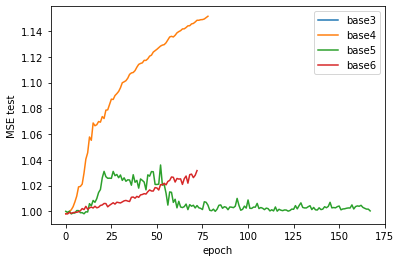

In [389]:
pivoted_df = pd.pivot(val_stats[val_stats["index"]=="mean"][["squared_errors","epoch","model_name"]],
                      index="epoch",
                      columns="model_name")
pivoted_df.columns = pivoted_df.columns.droplevel(0)
pivoted_df.columns.name = None
(pivoted_df/pivoted_df.iloc[0].max()).plot(xlabel="epoch", ylabel="MSE test")

<AxesSubplot:xlabel='epoch', ylabel='MAE test'>

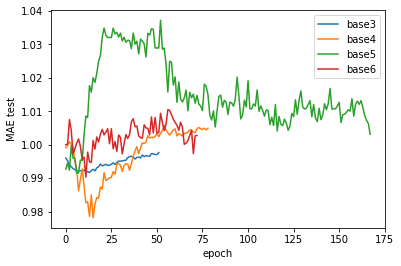

In [390]:
pivoted_df = pd.pivot(val_stats[val_stats["index"]=="mean"][["absolute_errors","epoch","model_name"]],
                      index="epoch",
                      columns="model_name")
pivoted_df.columns = pivoted_df.columns.droplevel(0)
pivoted_df.columns.name = None
(pivoted_df/pivoted_df.iloc[0].max()).plot(xlabel="epoch", ylabel="MAE test")

<AxesSubplot:ylabel='% max loss'>

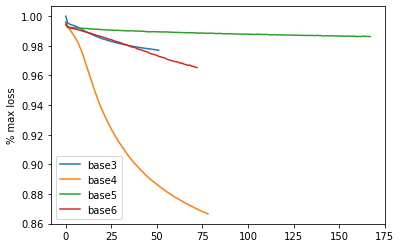

In [391]:
(models_loss_evol/models_loss_evol.max().max()).plot(ylabel="% max loss")

<AxesSubplot:ylabel='- loss_evol'>

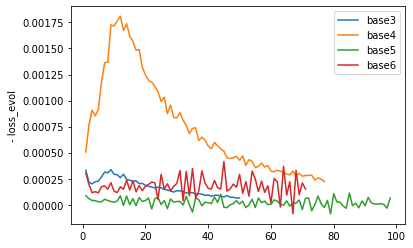

In [392]:
(-(models_loss_evol[1:].reset_index(drop=True)-models_loss_evol[:-1]))[1:99].plot(ylabel="- loss_evol")